In [ ]:
import os
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
!unlink "/content/coopmotion"
!ln -s "/gdrive/My Drive/coopmotion/" "/content/coopmotion"
!rm -r "/content/coopmotion/dataset (1)" "/content/coopmotion/dataset" "/content/coopmotion/models"

In [16]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../src')
sys.path.append('coopmotion/src')
from matplotlib import pyplot as plt
from task.fancy import animate_with_targets, plot_trace
import numpy as np
import torch
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Learning

In [134]:
from task.dataset import generate_non_sequential_dataset, generate_randomstart_dataset, central_dataset
from task.square import static_evenly_spread_task, SegmentRun, proportional, sense_in_range
controller = proportional
N = 4
number_of_samples = 100
eps = 0.000001
task = static_evenly_spread_task(N)
run = SegmentRun(task, controller=controller, sensor=sense_in_range(6), dt=0.1)
train_dataset = central_dataset(generate_non_sequential_dataset(run=run, number=number_of_samples, epsilon=eps))
test_dataset = central_dataset(generate_non_sequential_dataset(run=run, number=number_of_samples, epsilon=eps))

(26184, 4, 3) (26184, 4, 2)
(26098, 4, 3) (26098, 4, 2)


## Centralized Network

In [135]:
from network import CentralizedNet, train_net
net = CentralizedNet(4)
training_loss, testing_loss = [], []
train_net(epochs=500, net=net, train_dataset=train_dataset, test_dataset=test_dataset, batch_size=100, 
          training_loss=training_loss, testing_loss=testing_loss);



  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 1/500 [00:00<06:56,  1.20it/s]

  0%|          | 2/500 [00:01<06:55,  1.20it/s]

  1%|          | 3/500 [00:02<06:52,  1.20it/s]

  1%|          | 4/500 [00:03<06:51,  1.21it/s]

  1%|          | 5/500 [00:04<06:49,  1.21it/s]

  1%|          | 6/500 [00:04<06:48,  1.21it/s]

  1%|▏         | 7/500 [00:05<06:47,  1.21it/s]

  2%|▏         | 8/500 [00:06<06:55,  1.19it/s]

  2%|▏         | 9/500 [00:07<07:01,  1.16it/s]

  2%|▏         | 10/500 [00:08<06:54,  1.18it/s]

  2%|▏         | 11/500 [00:09<06:49,  1.19it/s]

  2%|▏         | 12/500 [00:10<06:49,  1.19it/s]

  3%|▎         | 13/500 [00:10<06:53,  1.18it/s]

  3%|▎         | 14/500 [00:11<06:51,  1.18it/s]

  3%|▎         | 15/500 [00:12<06:46,  1.19it/s]

  3%|▎         | 16/500 [00:13<06:41,  1.21it/s]

  3%|▎         | 17/500 [00:14<06:36,  1.22it/s]

  4%|▎         | 18/500 [00:15<06:48,  1.18it/s]

  4%|▍         | 19/500 [00:15<06:49,  1.17it/s]

  4%|▍         |

 29%|██▉       | 145/500 [01:55<04:40,  1.26it/s]

 29%|██▉       | 146/500 [01:56<05:02,  1.17it/s]

 29%|██▉       | 147/500 [01:57<05:08,  1.14it/s]

 30%|██▉       | 148/500 [01:58<05:10,  1.14it/s]

 30%|██▉       | 149/500 [01:59<05:08,  1.14it/s]

 30%|███       | 150/500 [02:00<05:08,  1.14it/s]

 30%|███       | 151/500 [02:01<05:07,  1.14it/s]

 30%|███       | 152/500 [02:02<05:02,  1.15it/s]

 31%|███       | 153/500 [02:02<04:54,  1.18it/s]

 31%|███       | 154/500 [02:03<04:51,  1.19it/s]

 31%|███       | 155/500 [02:04<04:49,  1.19it/s]

 31%|███       | 156/500 [02:05<04:46,  1.20it/s]

 31%|███▏      | 157/500 [02:06<04:44,  1.21it/s]

 32%|███▏      | 158/500 [02:06<04:43,  1.21it/s]

 32%|███▏      | 159/500 [02:07<04:44,  1.20it/s]

 32%|███▏      | 160/500 [02:08<04:39,  1.22it/s]

 32%|███▏      | 161/500 [02:09<04:36,  1.23it/s]

 32%|███▏      | 162/500 [02:10<04:34,  1.23it/s]

 33%|███▎      | 163/500 [02:11<04:33,  1.23it/s]

 33%|███▎      | 164/500 [02:11

 58%|█████▊    | 288/500 [03:52<02:49,  1.25it/s]

 58%|█████▊    | 289/500 [03:53<02:47,  1.26it/s]

 58%|█████▊    | 290/500 [03:54<02:46,  1.26it/s]

 58%|█████▊    | 291/500 [03:55<02:47,  1.25it/s]

 58%|█████▊    | 292/500 [03:55<02:44,  1.27it/s]

 59%|█████▊    | 293/500 [03:56<02:42,  1.27it/s]

 59%|█████▉    | 294/500 [03:57<02:42,  1.27it/s]

 59%|█████▉    | 295/500 [03:58<02:40,  1.27it/s]

 59%|█████▉    | 296/500 [03:59<02:42,  1.26it/s]

 59%|█████▉    | 297/500 [03:59<02:40,  1.26it/s]

 60%|█████▉    | 298/500 [04:00<02:39,  1.27it/s]

 60%|█████▉    | 299/500 [04:01<02:37,  1.27it/s]

 60%|██████    | 300/500 [04:02<02:36,  1.28it/s]

 60%|██████    | 301/500 [04:03<02:36,  1.27it/s]

 60%|██████    | 302/500 [04:03<02:34,  1.28it/s]

 61%|██████    | 303/500 [04:04<02:33,  1.28it/s]

 61%|██████    | 304/500 [04:05<02:33,  1.28it/s]

 61%|██████    | 305/500 [04:06<02:33,  1.27it/s]

 61%|██████    | 306/500 [04:06<02:32,  1.27it/s]

 61%|██████▏   | 307/500 [04:07

 86%|████████▌ | 431/500 [05:48<00:54,  1.27it/s]

 86%|████████▋ | 432/500 [05:49<00:53,  1.27it/s]

 87%|████████▋ | 433/500 [05:50<00:52,  1.27it/s]

 87%|████████▋ | 434/500 [05:51<00:52,  1.26it/s]

 87%|████████▋ | 435/500 [05:51<00:51,  1.26it/s]

 87%|████████▋ | 436/500 [05:52<00:50,  1.26it/s]

 87%|████████▋ | 437/500 [05:53<00:49,  1.26it/s]

 88%|████████▊ | 438/500 [05:54<00:49,  1.26it/s]

 88%|████████▊ | 439/500 [05:55<00:48,  1.27it/s]

 88%|████████▊ | 440/500 [05:55<00:47,  1.26it/s]

 88%|████████▊ | 441/500 [05:56<00:47,  1.25it/s]

 88%|████████▊ | 442/500 [05:57<00:46,  1.25it/s]

 89%|████████▊ | 443/500 [05:58<00:45,  1.25it/s]

 89%|████████▉ | 444/500 [05:59<00:44,  1.26it/s]

 89%|████████▉ | 445/500 [05:59<00:44,  1.25it/s]

 89%|████████▉ | 446/500 [06:00<00:43,  1.23it/s]

 89%|████████▉ | 447/500 [06:01<00:42,  1.24it/s]

 90%|████████▉ | 448/500 [06:02<00:42,  1.24it/s]

 90%|████████▉ | 449/500 [06:03<00:41,  1.24it/s]

 90%|█████████ | 450/500 [06:03

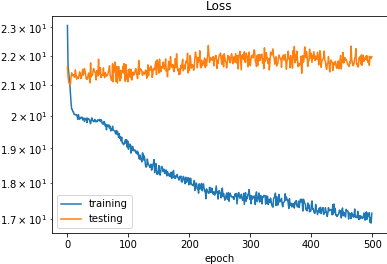

In [136]:
plt.title('Loss')
plt.semilogy(training_loss, label='training')
plt.semilogy(testing_loss, label='testing')
plt.xlabel('epoch')
plt.legend()
plt.savefig('centralized_train_loss')

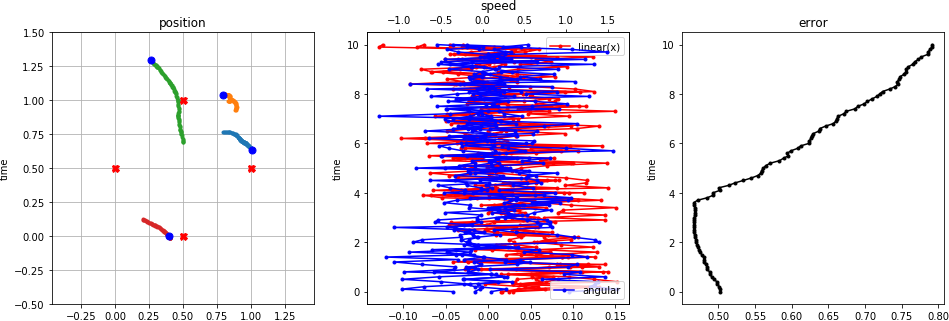

In [137]:
from task import Run
from task.square import dynamic, sense_in_range
net_controller = net.controller()
net_run = Run(task, dynamic=dynamic(dt=0.1), sensor=run.sensor, dt=0.1, controller=net_controller)
trace = net_run(T=10, epsilon=0.01)
plot_trace(trace, task)

In [138]:
animate_with_targets(trace, sensor=net_run.sensor, save_to='centralized_hungarian.mp4')

### How well are we controlling the agents?

In [150]:
from task.dataset import generate_sequential_dataset
exact_traces = generate_sequential_dataset(run, number=100, duration=10, epsilon=0.01)
net_traces = generate_sequential_dataset(net_run, number=100, duration=10, epsilon=0.01)
from task import prepare
exact_traces = [prepare(t, padding=True, steps=50) for t in exact_traces]
net_traces = [prepare(t, padding=True, steps=50) for t in net_traces]
time = exact_traces[0].time
exact_error = np.array([t.error for t in exact_traces])
net_error = np.array([t.error for t in net_traces])

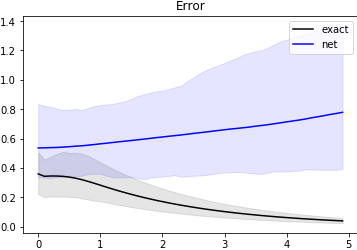

In [151]:
def plot_error(time, error, **kwargs):
    m = np.mean(error, axis=0)
    q95 = np.quantile(error, 0.95, axis=0)
    q5 = np.quantile(error, 0.05, axis=0)
    label = kwargs.pop('label', '')
    plt.plot(time, m, '-', label=label, **kwargs)
    plt.fill_between(time, q5, q95, alpha=0.1, **kwargs)
plot_error(time, exact_error, color='black', label='exact')
plot_error(time, net_error, color='blue', label='net')
plt.legend()
plt.savefig('centralized_hungarian_error_comp')
plt.title('Error');

## Distributed Network

In [139]:
from task.square import SegmentRun, smart_static_evenly_spread_task, dynamic_evenly_spread_task, sense_in_range
from task.dataset import distributed_dataset

In [140]:
N = 4
number_of_samples = 10
EPS = 0.001
task = dynamic_evenly_spread_task(N)
#generate_non_sequential_dataset(run=run, number=number_of_samples, epsilon=0.00001)
run = SegmentRun(task, controller=controller, sensor=sense_in_range(0.7), dt=0.1)
d_train_dataset = distributed_dataset(generate_non_sequential_dataset(run=run, number=number_of_samples, epsilon=EPS))
d_test_dataset = distributed_dataset(generate_non_sequential_dataset(run=run, number=number_of_samples, epsilon=EPS))
#d_train_dataset = distributed_dataset(generate_randomstart_dataset(run=run, number=number_of_samples))
#d_test_dataset = distributed_dataset(generate_randomstart_dataset(run=run, number=number_of_samples))

In [142]:
from network import DistributedNet
d_net = DistributedNet(run.sensor.get_input_size(N))
d_training_loss, d_testing_loss = [], []
train_net(epochs=500, net=d_net, train_dataset=d_train_dataset, test_dataset=d_test_dataset, batch_size=100, 
          training_loss=d_training_loss, testing_loss=d_testing_loss);



  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 1/500 [00:00<01:28,  5.66it/s]

  0%|          | 2/500 [00:00<01:26,  5.73it/s]

  1%|          | 3/500 [00:00<01:23,  5.94it/s]

  1%|          | 4/500 [00:00<01:21,  6.07it/s]

  1%|          | 5/500 [00:00<01:19,  6.21it/s]

  1%|          | 6/500 [00:00<01:18,  6.31it/s]

  1%|▏         | 7/500 [00:01<01:18,  6.28it/s]

  2%|▏         | 8/500 [00:01<01:21,  6.06it/s]

  2%|▏         | 9/500 [00:01<01:21,  6.05it/s]

  2%|▏         | 10/500 [00:01<01:21,  6.01it/s]

  2%|▏         | 11/500 [00:01<01:22,  5.94it/s]

  2%|▏         | 12/500 [00:01<01:21,  5.98it/s]

  3%|▎         | 13/500 [00:02<01:20,  6.04it/s]

  3%|▎         | 14/500 [00:02<01:19,  6.14it/s]

  3%|▎         | 15/500 [00:02<01:18,  6.18it/s]

  3%|▎         | 16/500 [00:02<01:19,  6.05it/s]

  3%|▎         | 17/500 [00:02<01:19,  6.11it/s]

  4%|▎         | 18/500 [00:02<01:17,  6.25it/s]

  4%|▍         | 19/500 [00:03<01:15,  6.36it/s]

  4%|▍         |

 29%|██▉       | 145/500 [00:22<00:55,  6.39it/s]

 29%|██▉       | 146/500 [00:22<00:54,  6.49it/s]

 29%|██▉       | 147/500 [00:22<00:53,  6.61it/s]

 30%|██▉       | 148/500 [00:23<00:52,  6.70it/s]

 30%|██▉       | 149/500 [00:23<00:51,  6.77it/s]

 30%|███       | 150/500 [00:23<00:52,  6.61it/s]

 30%|███       | 151/500 [00:23<00:52,  6.60it/s]

 30%|███       | 152/500 [00:23<00:51,  6.71it/s]

 31%|███       | 153/500 [00:23<00:51,  6.68it/s]

 31%|███       | 154/500 [00:23<00:51,  6.74it/s]

 31%|███       | 155/500 [00:24<00:51,  6.69it/s]

 31%|███       | 156/500 [00:24<00:52,  6.61it/s]

 31%|███▏      | 157/500 [00:24<00:51,  6.61it/s]

 32%|███▏      | 158/500 [00:24<00:50,  6.74it/s]

 32%|███▏      | 159/500 [00:24<00:50,  6.80it/s]

 32%|███▏      | 160/500 [00:24<00:50,  6.77it/s]

 32%|███▏      | 161/500 [00:24<00:49,  6.84it/s]

 32%|███▏      | 162/500 [00:25<00:49,  6.85it/s]

 33%|███▎      | 163/500 [00:25<00:50,  6.70it/s]

 33%|███▎      | 164/500 [00:25

 58%|█████▊    | 288/500 [00:44<00:32,  6.52it/s]

 58%|█████▊    | 289/500 [00:44<00:32,  6.58it/s]

 58%|█████▊    | 290/500 [00:44<00:31,  6.57it/s]

 58%|█████▊    | 291/500 [00:44<00:32,  6.53it/s]

 58%|█████▊    | 292/500 [00:44<00:32,  6.48it/s]

 59%|█████▊    | 293/500 [00:44<00:31,  6.52it/s]

 59%|█████▉    | 294/500 [00:45<00:31,  6.61it/s]

 59%|█████▉    | 295/500 [00:45<00:30,  6.64it/s]

 59%|█████▉    | 296/500 [00:45<00:30,  6.74it/s]

 59%|█████▉    | 297/500 [00:45<00:30,  6.67it/s]

 60%|█████▉    | 298/500 [00:45<00:30,  6.60it/s]

 60%|█████▉    | 299/500 [00:45<00:30,  6.55it/s]

 60%|██████    | 300/500 [00:45<00:30,  6.55it/s]

 60%|██████    | 301/500 [00:46<00:30,  6.53it/s]

 60%|██████    | 302/500 [00:46<00:30,  6.50it/s]

 61%|██████    | 303/500 [00:46<00:30,  6.48it/s]

 61%|██████    | 304/500 [00:46<00:30,  6.51it/s]

 61%|██████    | 305/500 [00:46<00:29,  6.52it/s]

 61%|██████    | 306/500 [00:46<00:29,  6.66it/s]

 61%|██████▏   | 307/500 [00:46

 86%|████████▌ | 431/500 [01:04<00:10,  6.89it/s]

 86%|████████▋ | 432/500 [01:05<00:09,  6.93it/s]

 87%|████████▋ | 433/500 [01:05<00:09,  6.87it/s]

 87%|████████▋ | 434/500 [01:05<00:09,  6.89it/s]

 87%|████████▋ | 435/500 [01:05<00:09,  6.94it/s]

 87%|████████▋ | 436/500 [01:05<00:09,  6.90it/s]

 87%|████████▋ | 437/500 [01:05<00:09,  6.95it/s]

 88%|████████▊ | 438/500 [01:05<00:08,  6.96it/s]

 88%|████████▊ | 439/500 [01:06<00:08,  6.92it/s]

 88%|████████▊ | 440/500 [01:06<00:08,  6.91it/s]

 88%|████████▊ | 441/500 [01:06<00:08,  6.93it/s]

 88%|████████▊ | 442/500 [01:06<00:08,  6.87it/s]

 89%|████████▊ | 443/500 [01:06<00:08,  6.89it/s]

 89%|████████▉ | 444/500 [01:06<00:08,  6.87it/s]

 89%|████████▉ | 445/500 [01:06<00:08,  6.70it/s]

 89%|████████▉ | 446/500 [01:07<00:08,  6.67it/s]

 89%|████████▉ | 447/500 [01:07<00:07,  6.66it/s]

 90%|████████▉ | 448/500 [01:07<00:07,  6.59it/s]

 90%|████████▉ | 449/500 [01:07<00:07,  6.54it/s]

 90%|█████████ | 450/500 [01:07

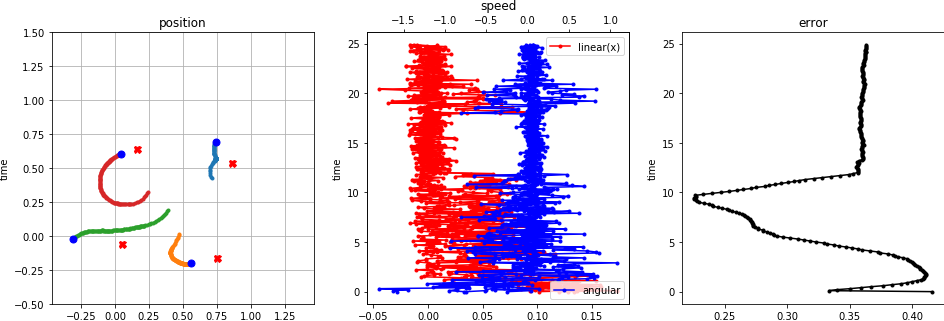

In [147]:
d_net_controller = d_net.controller()
d_net_run = Run(task, dynamic=dynamic(dt=0.1), sensor=run.sensor, dt=0.1, controller=d_net_controller)
trace = d_net_run(T=25, epsilon=0.01)
plot_trace(trace, task)

In [148]:
animate_with_targets(trace, sensor=net_run.sensor)

In [149]:
d_net_traces = generate_sequential_dataset(d_net_run, number=100, duration=10, epsilon=0.01)
d_net_traces = [prepare(t, padding=True, steps=50) for t in d_net_traces]
d_net_error = np.array([t.error for t in d_net_traces])

NameError: name 'generate_sequential_dataset' is not defined

In [ ]:
plot_error(time, exact_error, color='black', label='exact')
plot_error(time, net_error, color='blue', label='net')
plot_error(time, d_net_error, color='green', label='d_net')
plt.legend()
plt.title('Error');

## Distributed Communicating Network

In [153]:
from task.dataset import sequence_dataset
from task.square import smart_static_evenly_spread_task, sense_in_range, SegmentRun, proportional, static_zipf_task

In [155]:
number_of_samples = 10
run = SegmentRun(smart_static_evenly_spread_task(4), controller=controller, sensor=sense_in_range(0.8), dt=0.1)
train_traces = generate_sequential_dataset(run=run, number=number_of_samples)
test_traces = generate_sequential_dataset(run=run, number=number_of_samples)

Trace(time=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1]), pos_state=array([[[[-0.89589258, -0.44427073,  0.50204245],
         [ 0.44427073, -0.89589258,  0.32076841],
         [ 0.        ,  0.        ,  1.        ]],

        [[ 0.98745485,  0.15790163,  0.39069662],
         [-0.15790163,  0.98745485,  0.88624277],
         [ 0.        ,  0.        ,  1.        ]],

        [[ 0.8735708 , -0.48669709,  0.46588604],
         [ 0.48669709,  0.8735708 ,  0.31805098],
         [ 0.        ,  0.        ,  1.        ]],

        [[-0.77292371, -0.63449897,  0.80415288],
         [ 0

In [157]:
c_train_dataset = sequence_dataset(train_traces, steps=2)
c_test_dataset = sequence_dataset(test_traces, steps=2)
c_train_dataset[50]

IndexError: list index out of range

In [158]:
from com_network import ComNet

In [159]:
c_net = ComNet(N=N, broadcast=2)
c_training_loss, c_testing_loss = [], []

In [160]:
train_net(epochs=100, net=c_net, train_dataset=c_train_dataset, test_dataset=c_test_dataset, batch_size=100, 
          training_loss=c_training_loss, testing_loss=c_testing_loss);



  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 18399.30it/s]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  This is separate from the ipykernel package so we can avoid doing imports until


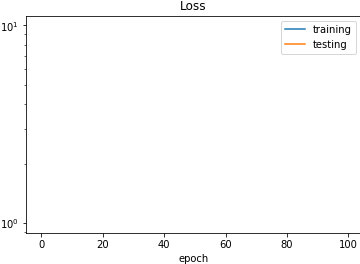

In [161]:
plt.title('Loss')
plt.semilogy(c_training_loss, label='training')
plt.semilogy(c_testing_loss, label='testing')
plt.xlabel('epoch')
plt.legend()

In [166]:
c_net_controller = c_net.controller()
c_net_run = Run(task, dynamic=dynamic(dt=0.1), sensor=run.sensor, dt=0.1, controller=c_net_controller)

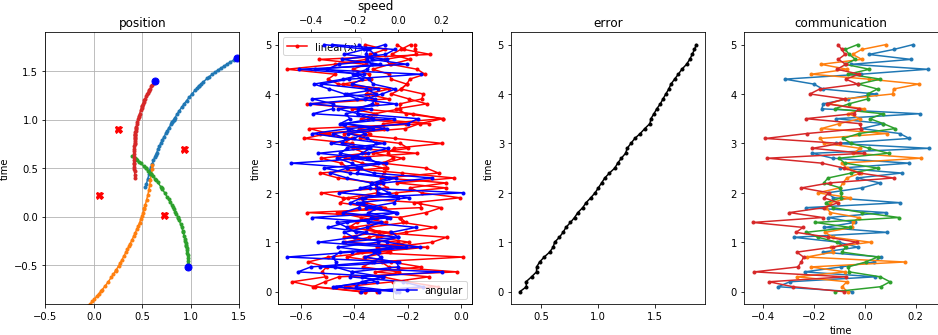

In [167]:
trace = c_net_run(T=5)
plot_trace(trace,task)

In [168]:
animate_with_targets(trace, sensor=net_run.sensor)

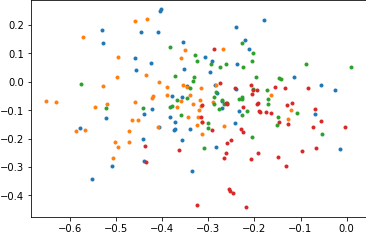

In [169]:
plt.plot(trace.control[:,:,0], trace.communication[:,0,:], '.')

In [170]:
c_net_traces = generate_sequential_dataset(c_net_run, number=100, duration=5, epsilon=0.01)

In [171]:
c_net_traces = [prepare(t, padding=True, steps=50) for t in c_net_traces]

In [172]:
c_net_error = np.array([t.error for t in c_net_traces])

NameError: name 'd_net_error' is not defined

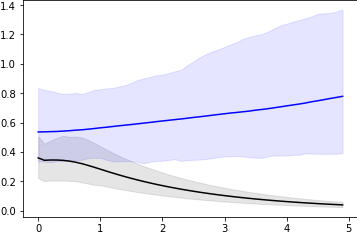

In [173]:
plot_error(time, exact_error, color='black', label='exact')
plot_error(time, net_error, color='blue', label='net')
plot_error(time, d_net_error, color='green', label='d_net')
plot_error(time, c_net_error, color='orange', label='c_net')
plt.legend()
plt.title('Error');